In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


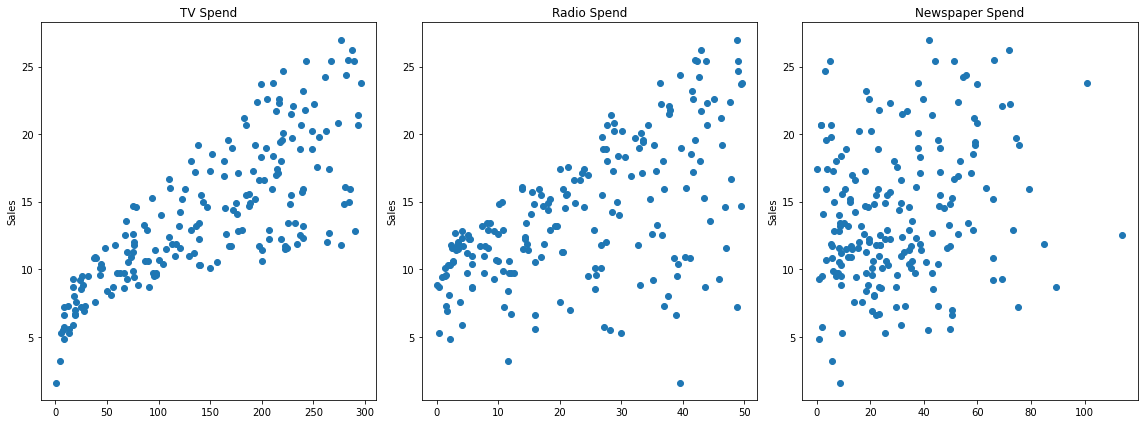

In [4]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

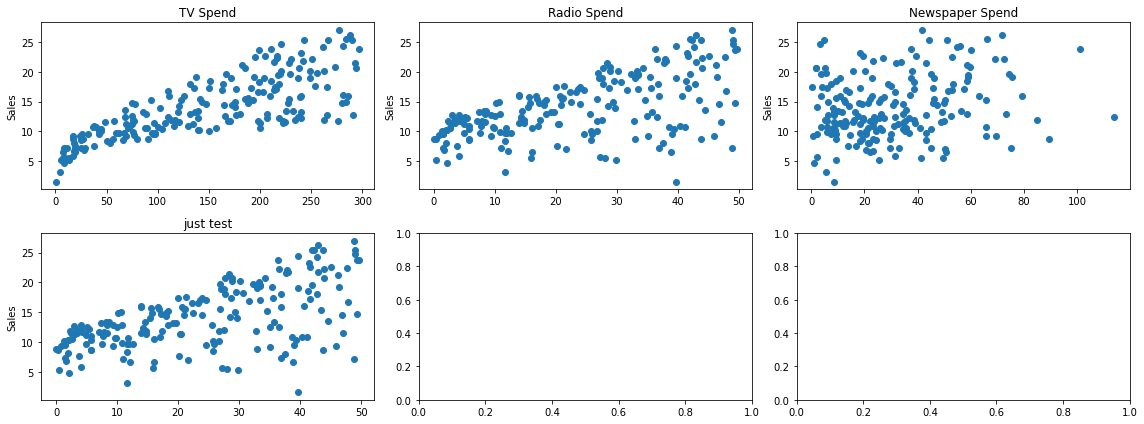

In [5]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,6))

axes[0][0].plot(df['TV'],df['sales'],'o')
axes[0][0].set_ylabel("Sales")
axes[0][0].set_title("TV Spend")

axes[0][1].plot(df['radio'],df['sales'],'o')
axes[0][1].set_title("Radio Spend")
axes[0][1].set_ylabel("Sales")

axes[0][2].plot(df['newspaper'],df['sales'],'o')
axes[0][2].set_title("Newspaper Spend");
axes[0][2].set_ylabel("Sales")

axes[1][0].plot(df['radio'],df['sales'],'o')
axes[1][0].set_title("just test")
axes[1][0].set_ylabel("Sales")

plt.tight_layout();

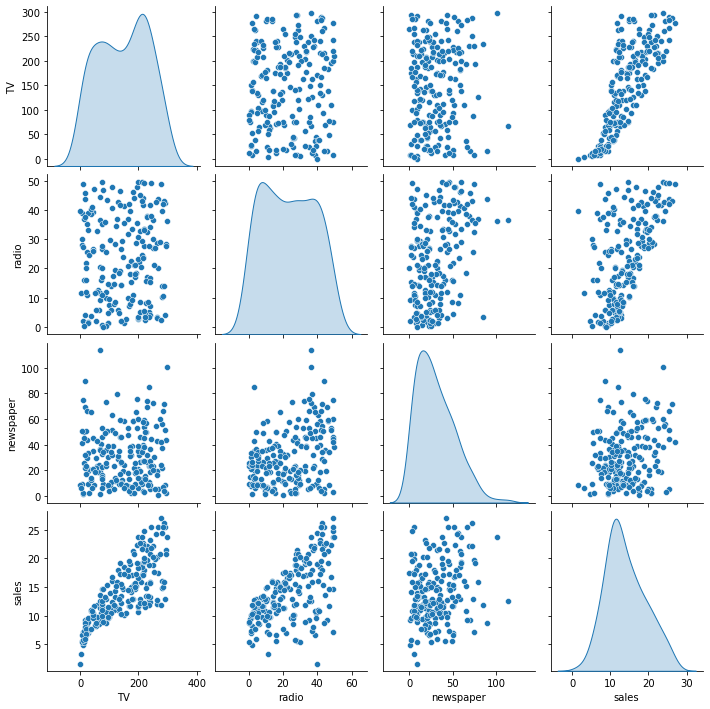

In [6]:
sns.pairplot(df, diag_kind='kde')

In [7]:
X = df.drop('sales',axis=1)
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [10]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
pred = model.predict(X_test)

In [15]:
pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
MAE = mean_absolute_error(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

In [18]:
print('MAE :',MAE)
print('MSE :',MSE)
print('RMSE :',RMSE)

MAE : 1.511669222454909
MSE : 3.7967972367152223
RMSE : 1.9485372043446392


In [19]:
residual = y_test-pred

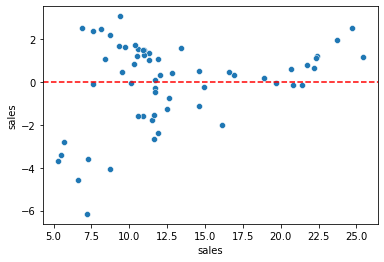

In [20]:
sns.scatterplot(x=y_test,y=residual)
plt.axhline(y=0, color='r', linestyle='--')

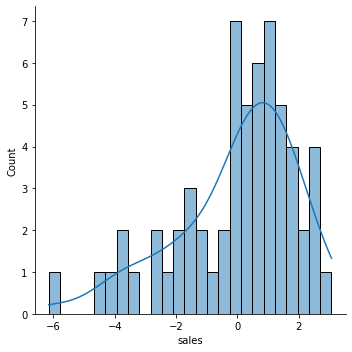

In [21]:
sns.displot(residual,bins=25,kde=True)

In [22]:
import scipy as sp

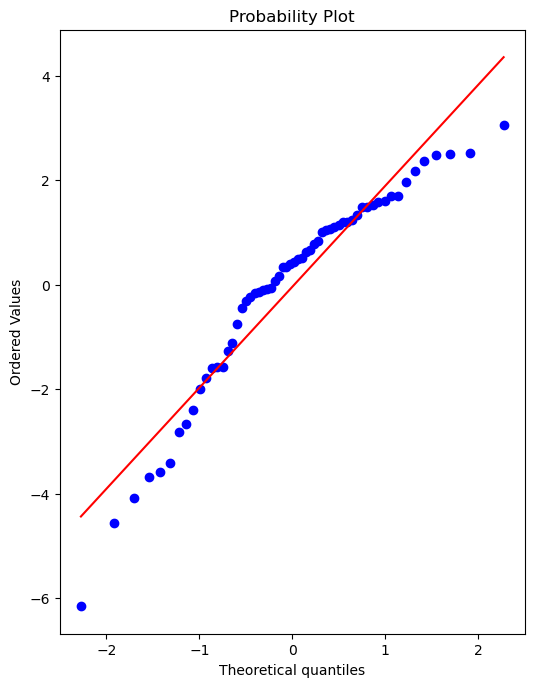

In [23]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = sp.stats.probplot(residual,plot=ax)

In [24]:
final_model = LinearRegression()

In [25]:
final_model.fit(X,y)

LinearRegression()

In [26]:
y_hat = final_model.predict(X)

In [27]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
#R square in sk learn

In [39]:
final_model.score(X,y)

0.8972106381789522

In [41]:
from sklearn.metrics import r2_score

In [51]:
r2 = r2_score(y, y_hat)

In [ ]:
#Adjusted r sqaured:

In [49]:
n = len(df)

In [50]:
p = df.shape[1]

In [54]:
1-r2

0.10278936182104781

In [55]:
n-1

199

In [56]:
n-p-1

195

In [61]:
#Adjusted R2

In [59]:
ar2 = 1-(((1-r2)*(n-1))/(n-p-1))

In [60]:
ar2

0.8951021384492897

In [28]:
pd.DataFrame(final_model.coef_,index =X.columns ,columns=['Coefficients'])

,Coefficients
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [29]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [30]:
new_Data = [[149,22,12]]

In [31]:
final_model.predict(new_Data)

array([13.893032])

In [32]:
from joblib import dump, load

In [33]:
dump(final_model, 'first_linear_model.joblib')

['first_linear_model.joblib']

In [34]:
loaded_model = load('first_linear_model.joblib')

In [35]:
loaded_model.predict(new_Data)

array([13.893032])

In [62]:
from pandas_profiling import ProfileReport

In [63]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
pf = ProfileReport(df)

In [65]:
pf.to_widgets()

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [67]:
pf.to_html()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

'<!doctype html><html lang=en><head><meta charset=utf-8><meta name=viewport content="width=device-width, initial-scale=1, shrink-to-fit=no"><meta name=description content="Profile report generated with the `pandas-profiling` Python package"><meta name=author content="Simon Brugman and the open source community."><meta name=generator content="Pandas Profiling v3.1.0"><meta name=url content=https://github.com/pandas-profiling/pandas-profiling><meta name=date content="2022-06-04 17:00:03.857193"><title>Pandas Profiling Report</title><style>\n/*!\n * Bootstrap v3.3.7 (http://getbootstrap.com)\n * Copyright 2011-2016 Twitter, Inc.\n * Licensed under MIT (https://github.com/twbs/bootstrap/blob/master/LICENSE)\n *//*! normalize.css v3.0.3 | MIT License | github.com/necolas/normalize.css */html{font-family:sans-serif;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,hgroup,main,menu,nav,section,summary{display:block}audi

AttributeError: 'function' object has no attribute 'to_html'

In [69]:
pf.to_file('pf.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]